In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Getting Data

In [2]:
data=pdr.get_data_yahoo('TATAPOWER.NS')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-11,84.199997,82.750000,84.000000,83.000000,4536568.0,70.476265
2017-07-12,84.000000,82.750000,83.699997,83.050003,3279731.0,70.518738
2017-07-13,83.900002,82.900002,83.599998,83.250000,1882220.0,70.688553
2017-07-14,83.599998,82.750000,83.349998,82.949997,4106073.0,70.433815
2017-07-17,84.099998,83.000000,83.000000,83.400002,5230073.0,70.815926
...,...,...,...,...,...,...
2022-07-04,212.800003,207.199997,207.699997,211.449997,14714951.0,211.449997
2022-07-05,217.100006,212.000000,214.500000,212.800003,18209477.0,212.800003
2022-07-06,214.750000,210.100006,212.500000,214.000000,13022748.0,214.000000


In [3]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-11,84.199997,82.750000,84.000000,83.000000,4536568.0,70.476265
2017-07-12,84.000000,82.750000,83.699997,83.050003,3279731.0,70.518738
2017-07-13,83.900002,82.900002,83.599998,83.250000,1882220.0,70.688553
2017-07-14,83.599998,82.750000,83.349998,82.949997,4106073.0,70.433815
2017-07-17,84.099998,83.000000,83.000000,83.400002,5230073.0,70.815926


<AxesSubplot:xlabel='Date'>

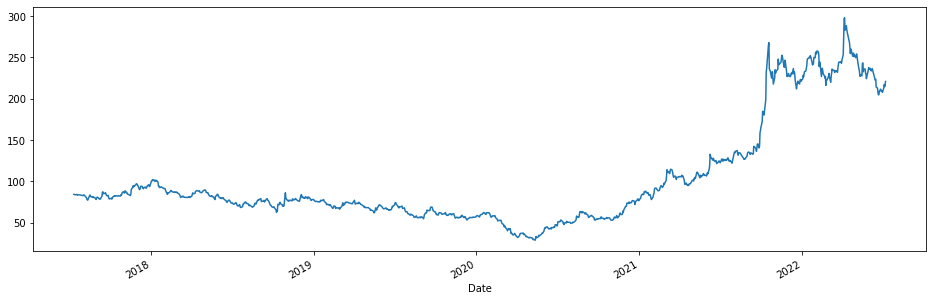

In [5]:
data['High'].plot(figsize=(16,5))

<AxesSubplot:xlabel='Date'>

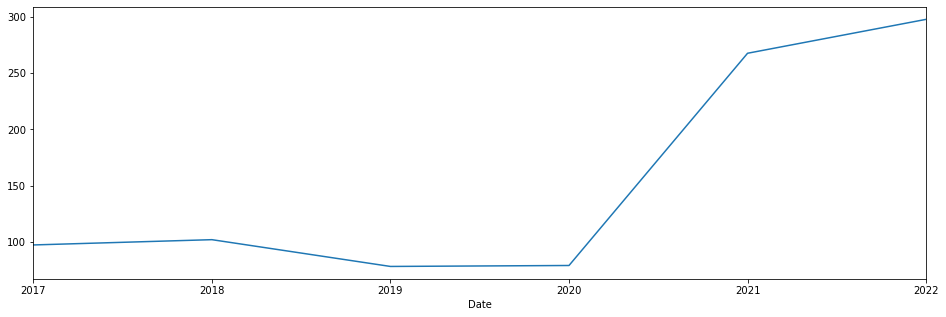

In [6]:
data['High'].resample('a').max().plot(figsize=(16,5))

## Simple Moving Average

In [7]:
data['30_SMA']=data['High'].rolling(30).mean()

In [8]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,30_SMA
Date,,,,,,,
2017-07-11,84.199997,82.750000,84.000000,83.000000,4536568.0,70.476265,NaN
2017-07-12,84.000000,82.750000,83.699997,83.050003,3279731.0,70.518738,NaN
2017-07-13,83.900002,82.900002,83.599998,83.250000,1882220.0,70.688553,NaN
2017-07-14,83.599998,82.750000,83.349998,82.949997,4106073.0,70.433815,NaN
2017-07-17,84.099998,83.000000,83.000000,83.400002,5230073.0,70.815926,NaN


<AxesSubplot:xlabel='Date'>

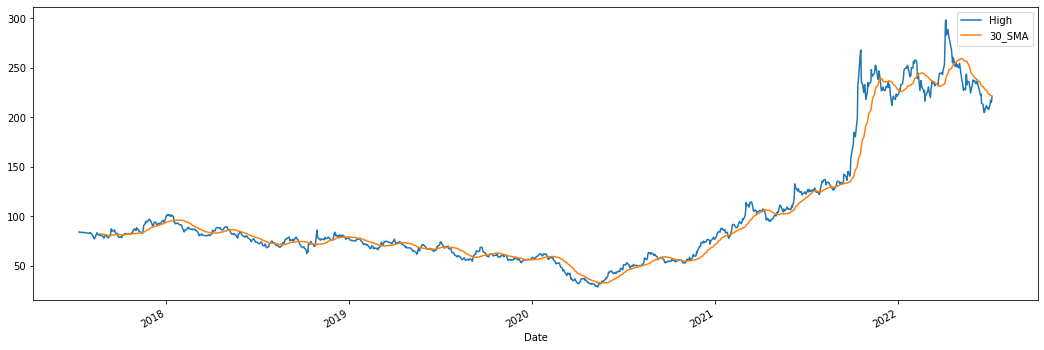

In [9]:
data[['High','30_SMA']].plot(figsize=(18,6))

## Cumulitive Moving Average

In [10]:
data['CMA']=data['High'].expanding(min_periods=30).mean()

<AxesSubplot:xlabel='Date'>

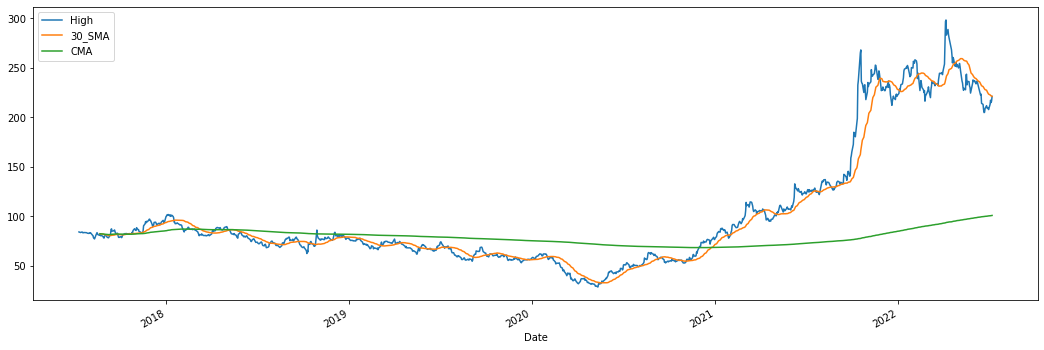

In [11]:
data[['High','30_SMA','CMA']].plot(figsize=(18,6))

## Exponential Moving Average

In [12]:
data['EMA']=(data['High']).ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

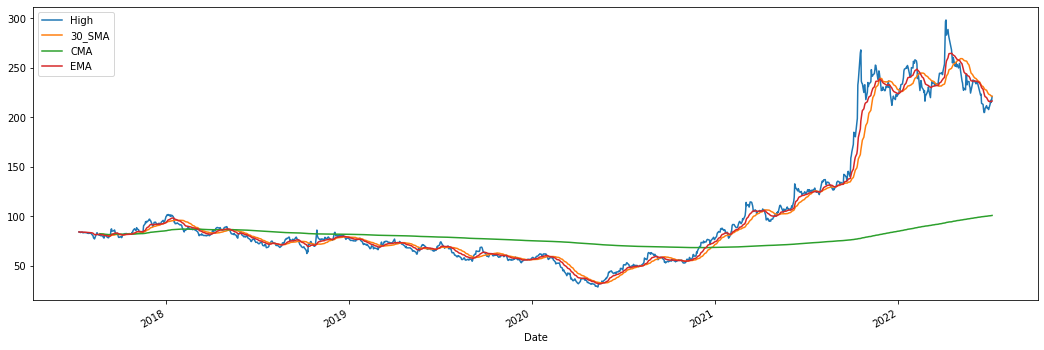

In [13]:
data[['High','30_SMA','CMA','EMA',]].plot(figsize=(18,6))

## Exponential Weighted Moving Average

In [14]:
data['EWMA']=(data['High']).ewm(span=30, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

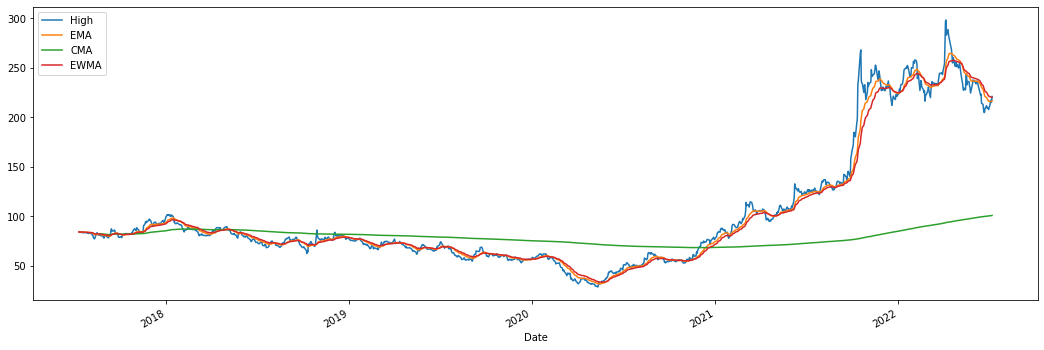

In [15]:
data[['High','EMA','CMA','EWMA',]].plot(figsize=(18,6))

In [16]:
data=data.reset_index()
data['Date']=pd.to_datetime(data['Date'])

## ADFULLER Test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adf_test(data.High)

ADF Statistics: -0.10154629240228563
p- value: 0.9492842988196255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
data['High_first_diffence']=data['High']-data['High'].shift(1)

In [21]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,30_SMA,CMA,EMA,EWMA,High_first_diffence
0,2017-07-11,84.199997,82.750000,84.000000,83.000000,4536568.0,70.476265,NaN,NaN,84.199997,84.199997,NaN
1,2017-07-12,84.000000,82.750000,83.699997,83.050003,3279731.0,70.518738,NaN,NaN,84.179997,84.187094,-0.199997
2,2017-07-13,83.900002,82.900002,83.599998,83.250000,1882220.0,70.688553,NaN,NaN,84.151998,84.168572,-0.099998
3,2017-07-14,83.599998,82.750000,83.349998,82.949997,4106073.0,70.433815,NaN,NaN,84.096798,84.131890,-0.300003
4,2017-07-17,84.099998,83.000000,83.000000,83.400002,5230073.0,70.815926,NaN,NaN,84.097118,84.129832,0.500000


In [22]:
adf_test(data['High_first_diffence'].dropna(axis=0))

ADF Statistics: -30.610147088574635
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Text(0.5, 1.0, 'High_first_diffence')

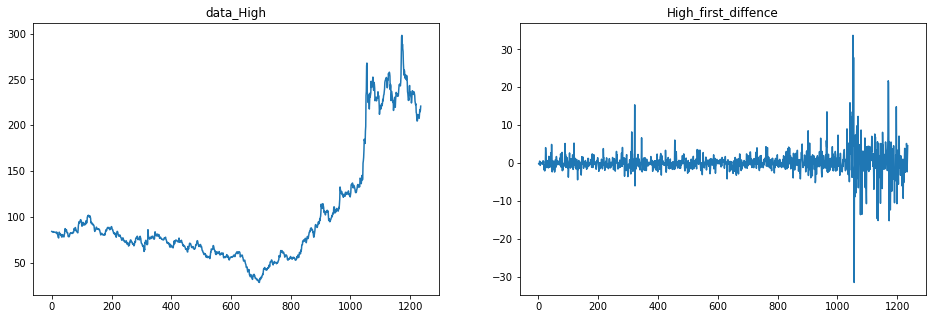

In [23]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].plot(data.High)
ax[0].set_title('data_High')


ax[1].plot(data['High_first_diffence'])
ax[1].set_title('High_first_diffence')


## Auto correaltion, Partial Auto correaltion

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

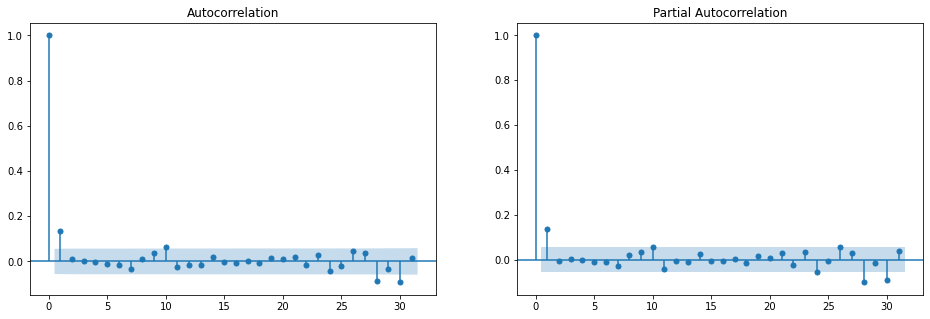

In [25]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
acf=plot_acf(data['High_first_diffence'].dropna(),ax=ax[0])
pacf=plot_pacf(data['High_first_diffence'].dropna(),ax=ax[1])


## Auto Arima

In [26]:
import pmdarima as pm

In [27]:
pred=pm.auto_arima(data.High,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6311.002, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6325.786, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6305.057, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6305.171, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6325.330, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6307.004, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6307.003, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6309.002, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6304.243, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6306.205, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6306.204, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6304.402, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6308.203, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.099 seconds


## Splitting into Trainnig and Testing

In [28]:
n=int(len(data.High)*0.90)
train_data=data.High[:n]
test_data=data.High[n:]
len(test_data)


124

## ARIMA Model

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA=ARIMA(train_data,order=(1,1,0))
model_Arima_fit=model_ARIMA.fit(disp=1)
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1111
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2678.701
Method:                       css-mle   S.D. of innovations              2.697
Date:                Sun, 10 Jul 2022   AIC                           5363.402
Time:                        18:00:11   BIC                           5378.441
Sample:                             1   HQIC                          5369.089
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1341      0.091      1.471      0.141      -0.045       0.313
ar.L1.D.High     0.1124      0.030      3.769      0.000       0.054       0.171
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.8993           +0.0000j            8.8993            0.0000
-----------------------------------------------------------------------------
"""

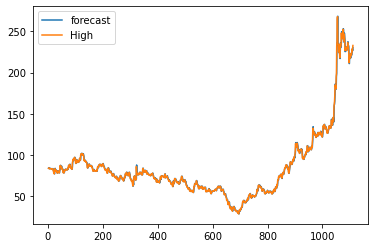

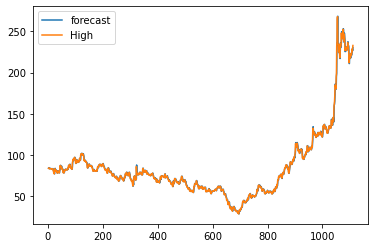

In [30]:
model_Arima_fit.plot_predict(dynamic=False)

<AxesSubplot:>

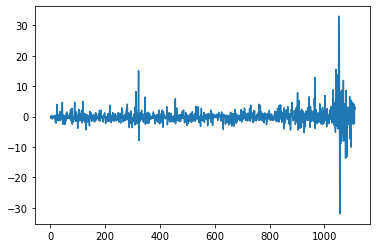

In [31]:
model_Arima_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

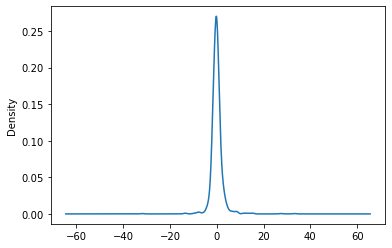

In [32]:
model_Arima_fit.resid.plot(kind='kde')

In [33]:
pred_arima=model_Arima_fit.predict(start=test_data.index[0],end=test_data.index[-1],typ='levels')
pred_arima

1112    233.311754
1113    233.482665
1114    233.620895
1115    233.755452
1116    233.889597
           ...    
1231    249.310266
1232    249.444359
1233    249.578452
1234    249.712544
1235    249.846637
Length: 124, dtype: float64

In [34]:
test_data=test_data.to_frame()
test_data['pred_arima']=pred_arima


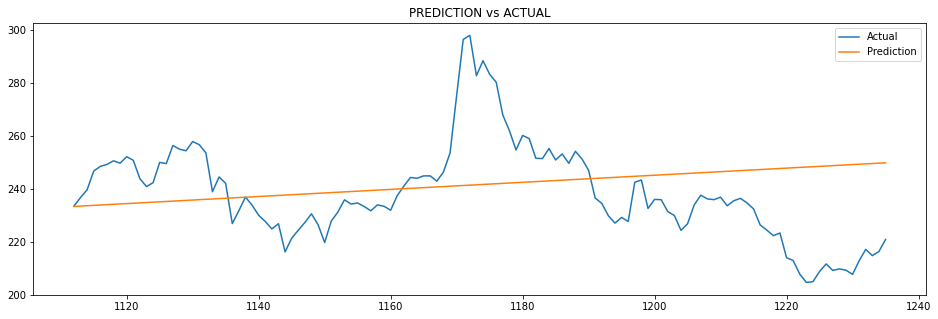

In [35]:
test_data['High'].plot(figsize=(16,5),label='Actual')
test_data['pred_arima'].plot(figsize=(16,5),label='Prediction')
plt.title('PREDICTION vs ACTUAL')

plt.legend()

## Building ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 1111
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2678.701
Method:                       css-mle   S.D. of innovations              2.697
Date:                Sun, 10 Jul 2022   AIC                           5363.402
Time:                        18:00:12   BIC                           5378.441
Sample:                             1   HQIC                          5369.089
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1341      0.091      1.471      0.141      -0.045       0.313
ar.L1.D.High     0.1124      0.030      3.769      0.000       0.054       0.171
                                    Roots   

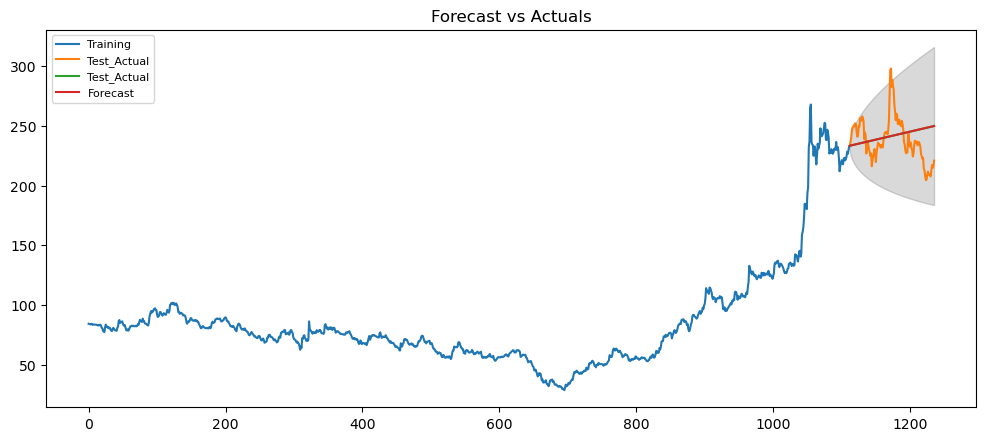

In [36]:
model = ARIMA(train_data, order=(1, 1, 0))  
fitted = model.fit(disp=1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(124, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Test_Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
fc_series.head()

1112    233.311754
1113    233.482665
1114    233.620895
1115    233.755452
1116    233.889597
dtype: float64